# Detección de componentes GUI

El objetivo de esta parte de nuestro trabajo es poder detectar, delimitar y posteriormente recortar, cada uno de los componentes gráficos (símbolos, imágenes o cuadros de texto) que componen una captura de pantalla.

## Importación de Librerías

Nos vamos a servir principalmente de dos librerías, keras_ocr y Opencv (Cv2).

In [ ]:
pip install keras-ocr

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
from google.colab.patches import cv2_imshow
# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


## Detección cuadros de texto: KERAS_OCR

Con el objetivo de detectar los cuadros de texto dentro las capturas de pantalla, definimos la función <code>get_keras_ocr_image</code>. Esta función tendrá como input una lista de imagénes, y como output, las coordenadas de las esquinas que conforman cada uno de los cuadros de texto detectados.


In [ ]:
image_path = "/content/prueba1.png"

In [ ]:
def get_keras_ocr_image(images_input):
  """
  Hay que pasarle el path o url de la imagen a tratar, o una lista con las urls en caso de ser varias.
  """
  if not isinstance(images_input, list):
    images_input = [images_input]
  # Get a set of three example images
  images = [
      keras_ocr.tools.read(url) for url in images_input
  ]
  # Each list of predictions in prediction_groups is a list of
  # (word, box) tuples.
  prediction_groups = pipeline.recognize(images)
  # Plot the predictions
  # fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
  # for ax, image, predictions in zip(axs, images, prediction_groups):
  #     keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)
  return prediction_groups

imgs = [
  image_path
]

esquinas_texto = get_keras_ocr_image(imgs)

## Detección de bordes y recortes: OpenCV



Hacemos uso de la libería OpenCV para llevar a cabo las siguientes tareas:
- Lectura de la imagen.
- Cálculo de intervalos ocupados por los cuadros de texto obtenidos a través de keras_ocr
- Tratamiento de la imagen:
  > Conversión a escala de grises.

  > Suavizado gaussiano a la imagen.

  > **Algoritmo de Canny** para la detección de bordes.

  > Obtención de contornos.

- Comparación entre contornos y cuadros de texto.

- Recorte final del componente.


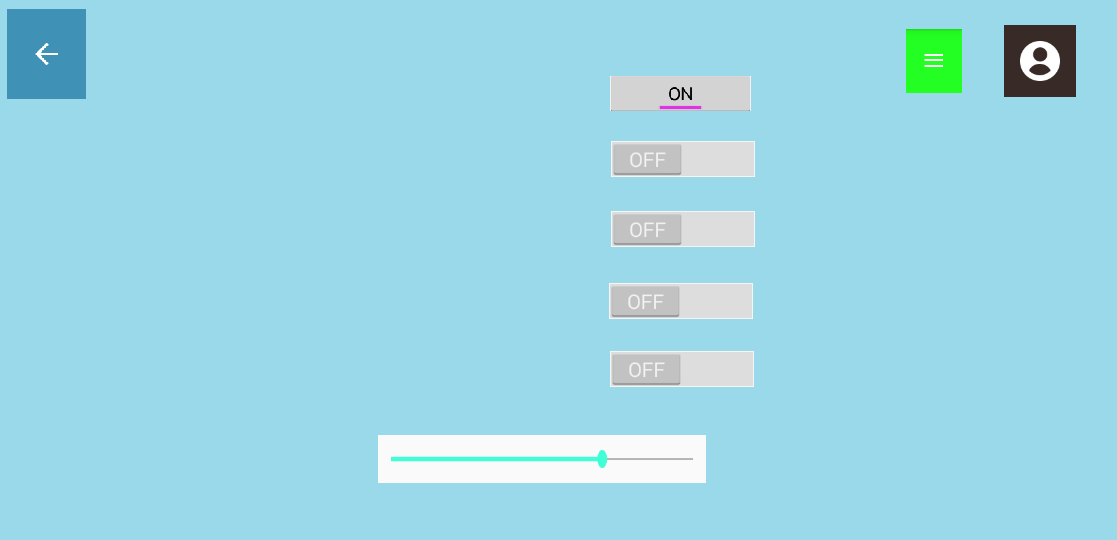


 Numero cuadros de texto detectados 5
intervalo y [[102, 86], [169, 152], [239, 222], [311, 294], [379, 363]]
intervalo x [[694, 667], [667, 629], [667, 629], [665, 627], [666, 628]]


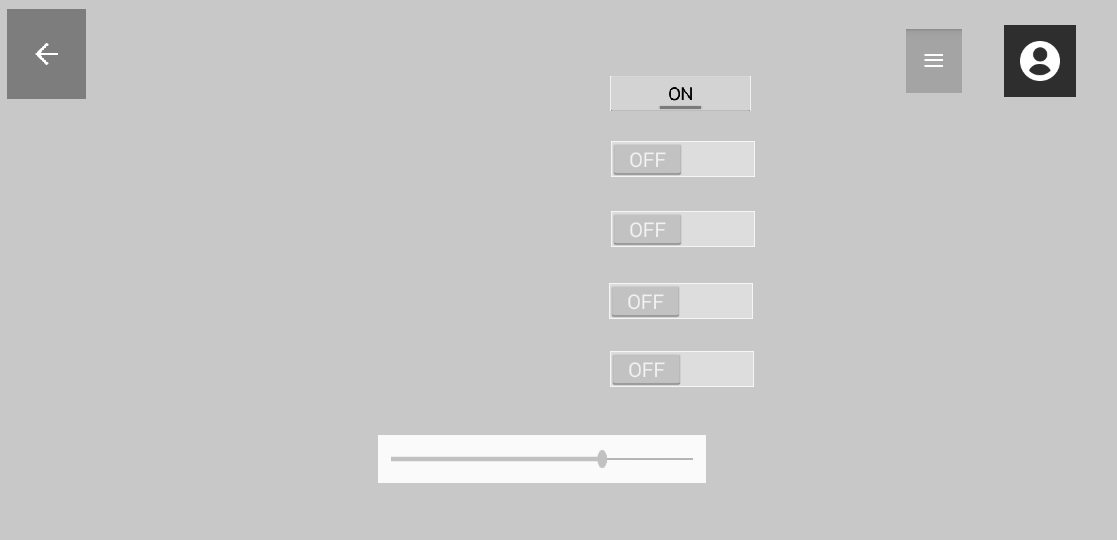

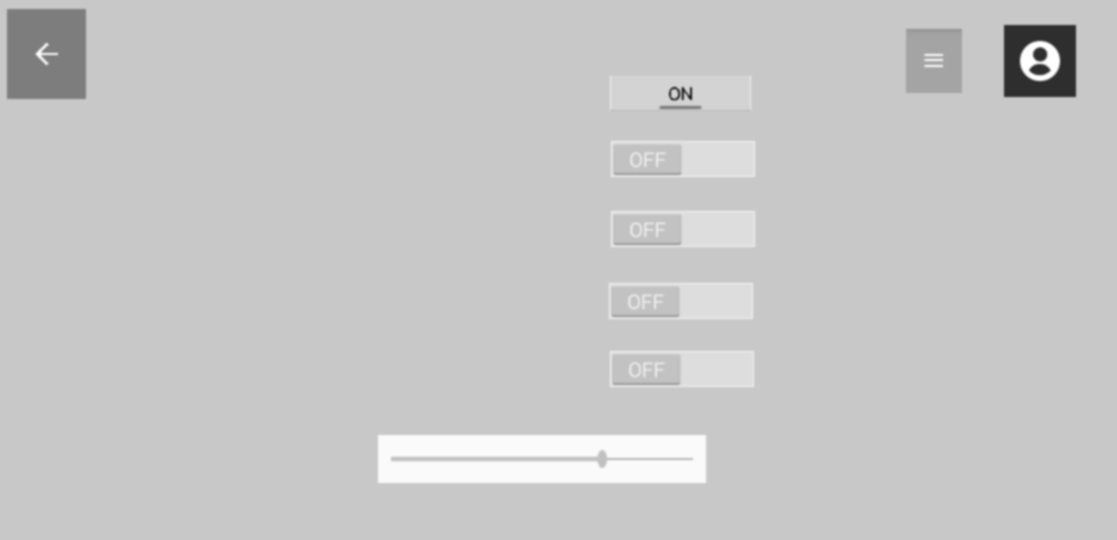

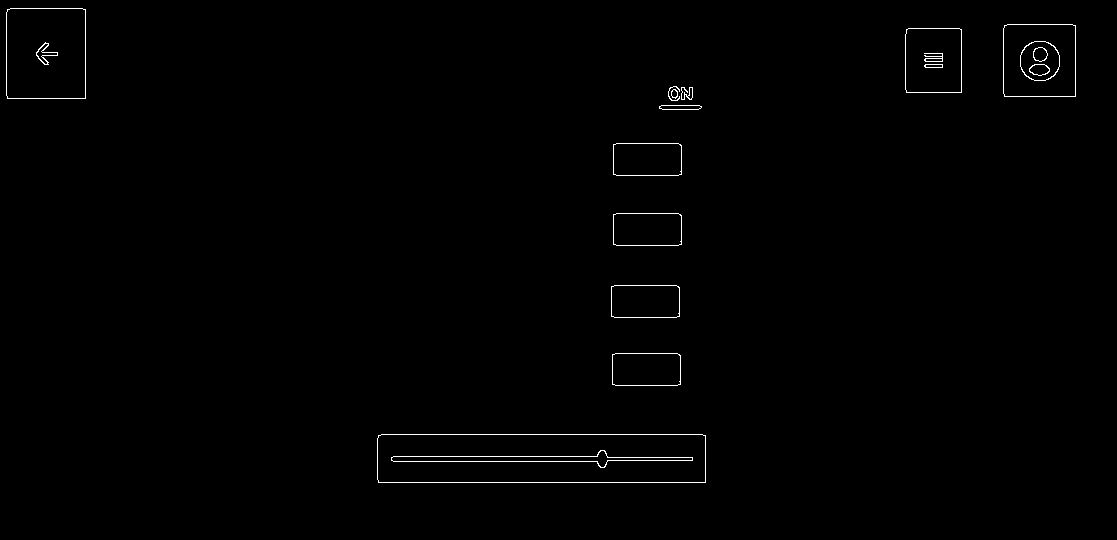


 Número de componentes GUI detectados: 12 



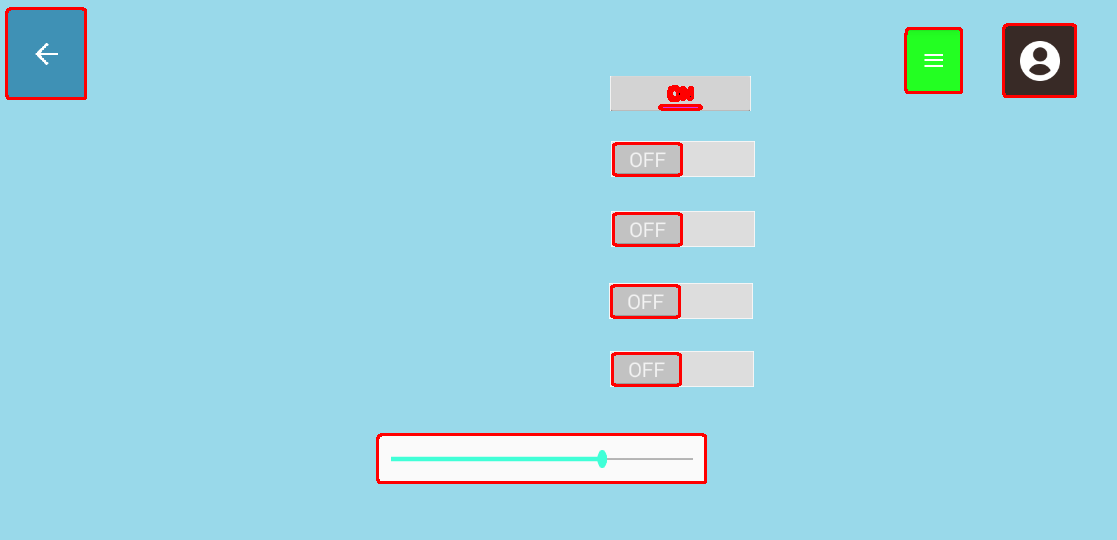

Coord x, componente1  377 : 705
Coord y, componente1  434 : 482
Coord x, componente2  612 : 680
Coord y, componente2  353 : 385
Coord x, componente3  611 : 679
Coord y, componente3  285 : 317
Coord x, componente4  613 : 681
Coord y, componente4  213 : 245
Coord x, componente5  613 : 681
Coord y, componente5  143 : 175
Coord x, componente6  659 : 701
Coord y, componente6  105 : 109
Coord x, componente7  671 : 677
Coord y, componente7  89 : 98
Componente 7 solapa con cuadro de texto
Coord x, componente8  681 : 692
Coord y, componente8  87 : 99
Componente 8 solapa con cuadro de texto
Coord x, componente9  668 : 679
Coord y, componente9  86 : 100
Componente 9 solapa con cuadro de texto
Coord x, componente10  905 : 961
Coord y, componente10  28 : 92
Coord x, componente11  1003 : 1075
Coord y, componente11  24 : 96
Coord x, componente12  6 : 85
Coord y, componente12  8 : 98




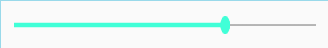

Componente nº 1 None 



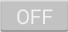

Componente nº 2 None 



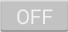

Componente nº 3 None 



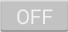

Componente nº 4 None 



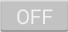

Componente nº 5 None 



Componente nº 6 None 



Componente nº 7 None 



Componente nº 8 None 



Componente nº 9 None 



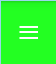

Componente nº 10 None 



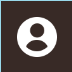

Componente nº 11 None 



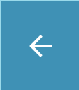

Componente nº 12 None 



In [ ]:
#Leemos la imagen

img = cv2.imread(image_path)
img_copy = img.copy()
cv2_imshow(img_copy)

#almaceno en global_y todas las coordenadas y de los cuadros de texto
#cada fila es un cuadro de texto distinto, mucho más amigable que el formato que devuelve keras_ocr
global_y = []
global_x = []
for j in range(0, len(esquinas_texto[0])):
  coordenada_y = []
  coordenada_x = []
  for i in range(0,len(esquinas_texto[0][j][1])):
    coordenada_y.append(esquinas_texto[0][j][1][i][1])
    coordenada_x.append(esquinas_texto[0][j][1][i][0])
  global_y.append(coordenada_y)
  global_x.append(coordenada_x)
  #print('Coord y, cuadro texto ' +str(j+1)+ str(global_y[j]))
  #print('Coord x, cuadro texto ' +str(j+1)+ str(global_x[j]))

print("\n Numero cuadros de texto detectados " + str(len(esquinas_texto[0])))

#Calculo los intervalos de los cuadros de texto
intervalo_y=[]
intervalo_x=[]
for j in range(0, len(global_y)):
  intervalo_y.append([int(max(global_y[j])), int(min(global_y[j]))])
  intervalo_x.append([int(max(global_x[j])), int(min(global_x[j]))])
print("intervalo y", intervalo_y)
print("intervalo x", intervalo_x)
  
# Convertimos a escala de grises
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gris)

# Aplicar suavizado Gaussiano
gauss = cv2.GaussianBlur(gris, (5,5), 0)
cv2_imshow(gauss)

# Detectamos los bordes con Canny
canny = cv2.Canny(gauss, 50, 150)
cv2_imshow(canny)

# Buscamos los contornos
(contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("\n Número de componentes GUI detectados:", len(contornos), "\n")

#y los dibujamos
cv2.drawContours(img_copy,contornos,-1,(0,0,255), 2)
cv2_imshow(img_copy)

#Llevamos a cabo los recortes para cada contorno detectado
recortes = []
for j in range(0,len(contornos)):
  cont_horizontal = []
  cont_vertical = []
  #obtenemos componentes máximas y mínimas (eje x,y) del contorno
  for i in range(0,len(contornos[j])-1):
    cont_horizontal.append(contornos[j][i][0][0])
    cont_vertical.append(contornos[j][i][0][1])
    x = min(cont_horizontal)
    w = max(cont_horizontal)
    y = min(cont_vertical)
    h = max(cont_vertical)
  print('Coord x, componente' + str(j+1) + '  ' + str(x) + ' : ' + str(w))
  print('Coord y, componente' + str(j+1) + '  ' + str(y) + ' : ' + str(h))
  #comprobamos que los contornos no solapen con cuadros de texto y optamos por recortar los cuadros de texto si solapan.
  for k in range(0,len(intervalo_y)):
    solapa_y = 0
    solapa_x = 0
    if (min(intervalo_y[k]) <= y <= max(intervalo_y[k])) or (min(intervalo_y[k]) <= h <= max(intervalo_y[k])):
      solapa_y = 1
    if (min(intervalo_x[k]) <= x <= max(intervalo_x[k])) or (min(intervalo_x[k]) <= w <= max(intervalo_x[k])):
      solapa_x = 1
    if (solapa_y == 1 and solapa_x == 1):
      x = min(intervalo_x[k])
      w = max(intervalo_x[k])
      y = min(intervalo_y[k])
      h = max(intervalo_y[k])
      #crop_img = img[min(intervalo_y[k]) : max(intervalo_y[k]), min(intervalo_x[k]) : max(intervalo_x[k])]
      print("Componente " + str(j+1) + " solapa con cuadro de texto")

  #if (solapa_y == 1 and solapa_x == 1):
    #crop_img = img[min(intervalo_y[k]) : max(intervalo_y[k]), min(intervalo_x[k]) : max(intervalo_x[k])]
    #print("Componente " + str(j+1) + " solapa con cuadro de texto")
    #recortes.append(crop_img)
  #else:
  crop_img = img[y:h, x:w]
  recortes.append(crop_img)


print("\n")

#Mostramos las imagenes recortada
for i in range(0,len(recortes)):
  if recortes[i].any():
    print("Componente nº",i+1,  cv2_imshow(recortes[i]), "\n")
  else:
    print("componente vacío")


# Bibliografía

**Tutoriales OpenCV:**

Canny edge detection: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html#canny

Contours in OpenCV: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_table_of_contents_contours/py_table_of_contents_contours.html#table-of-content-contours

**Tutoriales Keras-OCR:**
https://keras-ocr.readthedocs.io/en/latest/

**Ejemplo de proyecto OpenCV:**
https://programarfacil.com/blog/vision-artificial/detector-de-bordes-canny-opencv/